author: Songyang Cheng
date: 0911

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
%matplotlib inline

# Bus Rapid Transit System Lines
http://data-cityofmadison.opendata.arcgis.com/datasets/bus-rapid-transit-system-lines?orderBy=Type&orderByAsc=false&selectedAttribute=Corridor

In [3]:
brt_data = pd.read_csv("Bus_Rapid_Transit_System_Lines.csv")
brt_data.head()

,OBJECTID,Type,Comments,SHAPESTLength,Corridor,Notes
0,1,main,NaN,5884.251504,C,NaN
1,2,main,NaN,5587.122267,C,NaN
2,3,main,NaN,20640.279196,W,NaN
3,4,main,NaN,25912.556655,E,NaN
4,5,alt,NaN,16437.002031,N,sherman


In [47]:
brt_data.Type.value_counts(), brt_data.Corridor.value_counts()

(main    9
 alt     8
 ext     1
 Name: Type, dtype: int64, C    7
 W    5
 N    4
 S    1
 E    1
 Name: Corridor, dtype: int64)

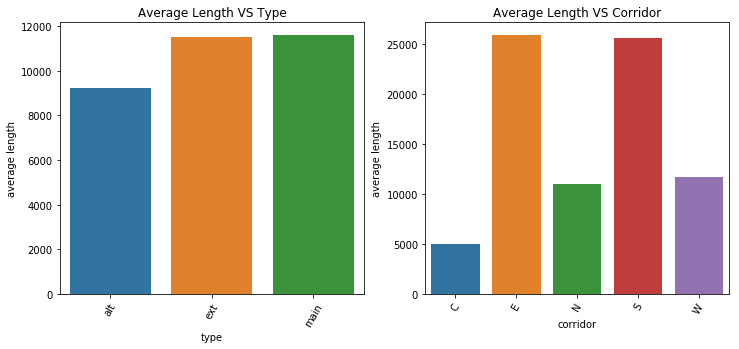

In [49]:
shape_len = brt_data.SHAPESTLength

plt.rcParams['figure.figsize'] = (12.0, 5.0)

plt.subplot(121)  # the first plot
len_mean_type = brt_data.groupby(brt_data.Type)["SHAPESTLength"].mean()
ax1 = sns.barplot(x = len_mean_type.index, y = len_mean_type.values)
ax1.set_title("Average Length VS Type")
ax1.set_xlabel("type")
ax1.set_xticklabels(labels = len_mean_type.index, rotation = 60)
ax1.set_ylabel("average length")


plt.subplot(122)  # the second plot 
len_mean_corridor = brt_data.groupby(brt_data.Corridor)["SHAPESTLength"].mean()
ax2 = sns.barplot(x = len_mean_corridor.index, y = len_mean_corridor.values)
ax2.set_title("Average Length VS Corridor")
ax2.set_xlabel("corridor")
ax2.set_xticklabels(labels = len_mean_corridor.index, rotation = 60)
ax2.set_ylabel("average length")
None

From the two plots above, we have a hunch that the bus lines with type of "main" and "ext" have a longer average length. In addition, the bus lines with Corridor of "E" and "S" seem to have longer average length. However, we need more data to draw the conclusion. 

# Metro Transit Ridership by Stop
http://data-cityofmadison.opendata.arcgis.com/datasets/metro-transit-ridership-by-stop/data

In [50]:
ridership = pd.read_csv("Metro_Transit_Ridership_by_Stop.csv")
ridership.head()

,X,Y,OBJECTID,StopID,StopDescription,Lat,Lon,IntersectionID,Weekday,Saturday,Sunday,Weekday_1_79,Saturday_1_79,Sunday_1_79,WkdSvc,WkdBdPerSvc,DotSize
0,-89.349317,43.127486,10694,9488,SB International AT Elder Care,43.127494,-89.349323,128,1.83,0.00,0.51,1.83,0.00,0.51,0,0,9173.69
1,-89.317427,43.121375,10695,9491,EB E Washington FS Lien,43.121383,-89.317433,545,2.17,0.00,2.52,2.17,0.00,2.52,0,0,10864.61
2,-89.349726,43.125722,10696,9493,NB International FS American,43.125730,-89.349732,551,3.84,0.51,0.00,3.84,0.51,0.00,0,0,19181.35
3,-89.315811,43.135619,10697,9494,SB Portage NS Rieder,43.135627,-89.315817,575,5.52,3.02,2.02,5.52,3.02,2.02,0,0,27579.41
4,-89.287892,43.132746,10698,9498,SB City View NS Wall,43.132754,-89.287898,563,4.05,0.50,1.50,4.05,0.50,1.50,0,0,20263.65


In [54]:
weekday_sort = ridership.Weekday.sort_values(ascending = False)
weekday_sort.head()

107    1712.50
253    1545.48
132    1423.77
106    1324.66
105    1261.37
Name: Weekday, dtype: float64

In [55]:
Saturday_sort = ridership.Saturday.sort_values(ascending = False)
Saturday_sort.head()

107    954.32
105    500.85
108    475.59
106    468.69
253    374.56
Name: Saturday, dtype: float64

In [56]:
Sunday_sort = ridership.Sunday.sort_values(ascending = False)
Sunday_sort.head()

107    679.61
106    400.18
253    357.74
108    354.92
105    337.97
Name: Sunday, dtype: float64

In [59]:
top = ridership.loc[[105, 106, 107, 108, 132, 253], ['Weekday', 'Saturday', 'Sunday']]
top

,Weekday,Saturday,Sunday
105,1261.37,500.85,337.97
106,1324.66,468.69,400.18
107,1712.50,954.32,679.61
108,1099.64,475.59,354.92
132,1423.77,233.21,244.73
253,1545.48,374.56,357.74


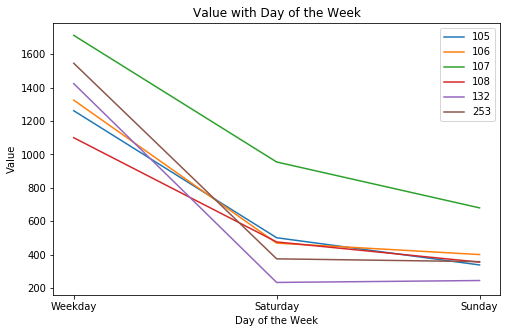

In [88]:
plt.figure(figsize=(8,5))
for it in (105, 106, 107, 108, 132, 253):
    plt.plot(top.loc[it].index, top.loc[it].values, label=str(it))
plt.title("Value with Day of the Week")
plt.xlabel('Day of the Week')
plt.ylabel('Value')
plt.legend()
plt.show()
None

We can see the value has a big drop in the Saturday and Sunday compared to its value in Weekday. 